<a href="https://colab.research.google.com/github/PsorTheDoctor/pybullet/blob/master/experimental/learning_robots_from_videos/learning_robots_from_videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Learning robots from videos

In [22]:
import numpy as np
from PIL import Image, ImageOps
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd gdrive/MyDrive/learning_robots_from_videos

/content/gdrive/MyDrive/learning_robots_from_videos


In [4]:
with open('report.txt', 'r') as f:
  lines = f.readlines()
  print(len(lines))

formattedLines = []
for i in range(len(lines) - 1):
  line = lines[i]
  nextLine = lines[i + 1]
  # If line starts with 'id' and next line ends with ']\n'
  if line[:2] == 'id' and nextLine[len(nextLine) - 2:] == ']\n':
    # Deleting \n
    line = line[:len(line) - 1]
    nextLine = nextLine[:len(nextLine) - 1]
    # Removing square brackets and multi spaces
    formattedLine = line + nextLine
    formattedLine = formattedLine.replace('[', '').replace(']', '') \
    .replace('  ', ' ').replace('  ', ' ').replace('  ', ' ')
    # Concatenaning lines and appending them
    formattedLines.append(formattedLine)

print(len(formattedLines))
print(formattedLines[0])

20069
9931
id: 0 joints: 0.2109 0.673 0.0145 0.4538 0.2607 0.8661 0.4338 0.2676 0.8326 0.0994 0.3137 0.4118 0.7252 0.6344


In [5]:
validIds = []
validJoints = []
for line in formattedLines:
  line = line.split(' ')
  validIds.append(int(line[1]))

  numJoints = 14
  joints = np.zeros(numJoints)
  for i in range(numJoints):
    joints[i] = float(line[i + 3])
  validJoints.append(joints)

print(len(validIds))
print(len(validJoints))

9931
9931


In [6]:
arrayJoints = np.array(validJoints)
print(arrayJoints.shape)

(9931, 14)


In [7]:
%cd images

/content/gdrive/MyDrive/learning_robots_from_videos/images


In [ ]:
images = []
for id in validIds:
  img = Image.open('{}.jpg'.format(id))
  images.append(np.array(img))
  if id % 100 == 0:
    print('\r img: {}'.format(id))

X = np.array(images)
X.shape

In [9]:
# Normalization
X_norm = X / 255.0 - 0.5
y_norm = arrayJoints / 3.5

X_train = X_norm[:7000]
X_test = X_norm[-2931:]
y_train = y_norm[:7000]
y_test = y_norm[-2931:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 224, 224)
(2931, 224, 224)
(7000, 14)
(2931, 14)


In [10]:
model = models.Sequential()

model.add(layers.Conv2D(128, (5, 5), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(14, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 33, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 19s 87ms/step - loss: 12.3325 - accuracy: 0.0720
Epoch 2/100
219/219 [==============================] - 19s 88ms/step - loss: 12.3312 - accuracy: 0.0796
Epoch 3/100
219/219 [==============================] - 19s 88ms/step - loss: 12.3127 - accuracy: 0.1076
Epoch 4/100
219/219 [==============================] - 19s 88ms/step - loss: 12.3013 - accuracy: 0.1156
Epoch 5/100
219/219 [==============================] - 19s 88ms/step - loss: 10.1742 - accuracy: 0.1076
Epoch 6/100
219/219 [==============================] - 19s 88ms/step - loss: 9.1802 - accuracy: 0.1214
Epoch 7/100
219/219 [==============================] - 19s 88ms/step - loss: 9.1719 - accuracy: 0.1339
Epoch 8/100
219/219 [==============================] - 19s 88ms/step - loss: 9.1643 - accuracy: 0.1340
Epoch 9/100
219/219 [==============================] - 19s 88ms/step - loss: 9.1548 - accuracy: 0.1393
Epoch 10/100
219/219 [==============================] - 19s 88ms/ste

In [15]:
model.save('mirrornet.h5')

Text(0, 0.5, 'Loss')

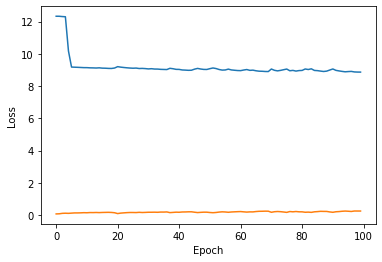

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [17]:
y_pred = model.predict(X_test)
print(y_test[0])
print(y_pred[0])

[0.18211429 0.22214286 0.02297143 0.15477143 0.23194286 0.0836
 0.23125714 0.20571429 0.17905714 0.04651429 0.03548571 0.00137143
 0.24211429 0.2146    ]
[163.44984  238.4727     0.       133.16922  165.5129    40.878613
 193.8238   214.49821  171.59686  148.36125  147.55734  234.8973
 105.488174 130.78993 ]


In [19]:
%cd ../

/content/gdrive/My Drive/learning_robots_from_videos


In [ ]:
img = Image.open('kuka.jpg').resize((224, 224))
gray = ImageOps.grayscale(img)
X_test[0] = np.array(gray)

y_pred = model.predict(X_test)
print(y_pred[0])